In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [11]:
big_mart_data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
big_mart_data.shape

(8523, 12)

In [13]:
# Getting some information about the datset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB




Categorical Features : 1) ProductID

2) FatContent

3) ProductType

4) OutletID

5) OutletSize

6) LocationType

7) OutletType


In [14]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
big_mart_data["Item_Weight"].mean()

12.857645184136183

In [18]:
big_mart_data["Item_Weight"].fillna(big_mart_data["Item_Weight"].mean(),inplace = True)

In [21]:
from scipy.stats import mode
mode_of_outlet_size = big_mart_data.pivot_table(values = 'Outlet_Size', index = 'Outlet_Type',aggfunc=(lambda x : mode(x.dropna()).mode[0]))

In [22]:
print(mode_of_outlet_size)

                  Outlet_Size
Outlet_Type                  
Grocery Store           Small
Supermarket Type1       Small
Supermarket Type2      Medium
Supermarket Type3      Medium


In [24]:
missing_values = big_mart_data["Outlet_Size"].isnull()

print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [25]:
big_mart_data.loc[missing_values, 'Outlet_Size'] = big_mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size.loc[x])

In [26]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [27]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Analysis

In [28]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [29]:
sns.set()

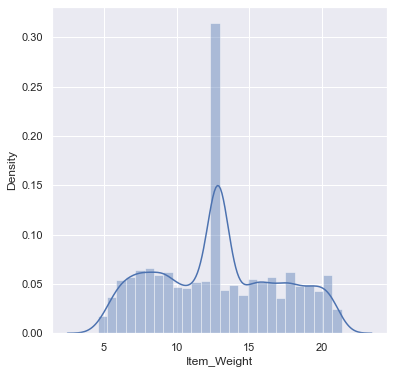

In [30]:
# Item_weight distribution 
plt.figure(figsize = (6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

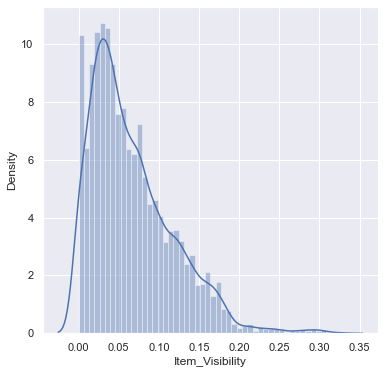

In [31]:
# Product Visibility distribution 
plt.figure(figsize = (6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

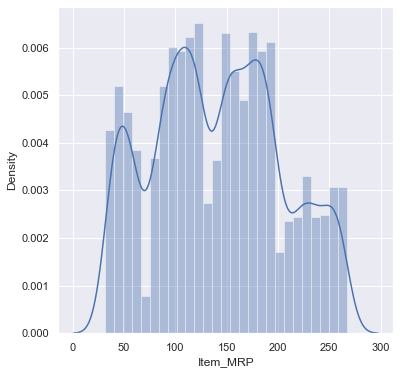

In [32]:
# MRP distribution 
plt.figure(figsize = (6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

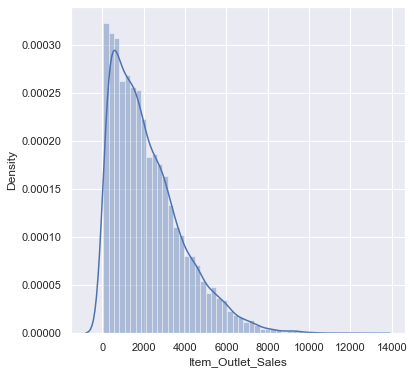

In [34]:
# OutletSales distribution 
plt.figure(figsize = (6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

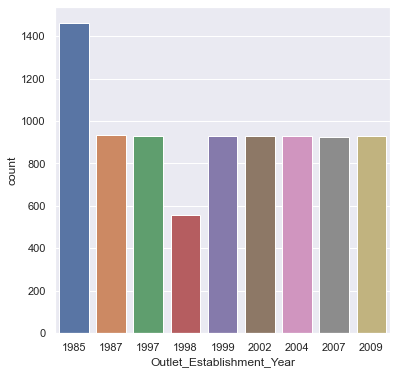

In [35]:
# Outlet Establishment Year
plt.figure(figsize = (6,6))
sns.countplot(x ='Outlet_Establishment_Year',data = big_mart_data)
plt.show()

# Categorical Features

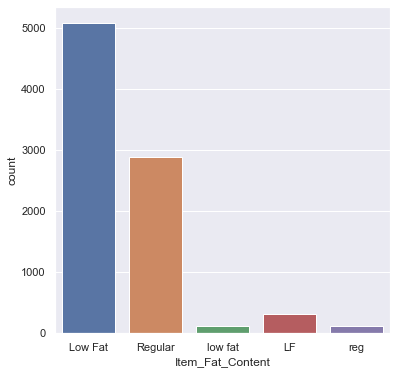

In [36]:
# FatContent
plt.figure(figsize = (6,6))
sns.countplot(x ='Item_Fat_Content',data = big_mart_data)
plt.show()

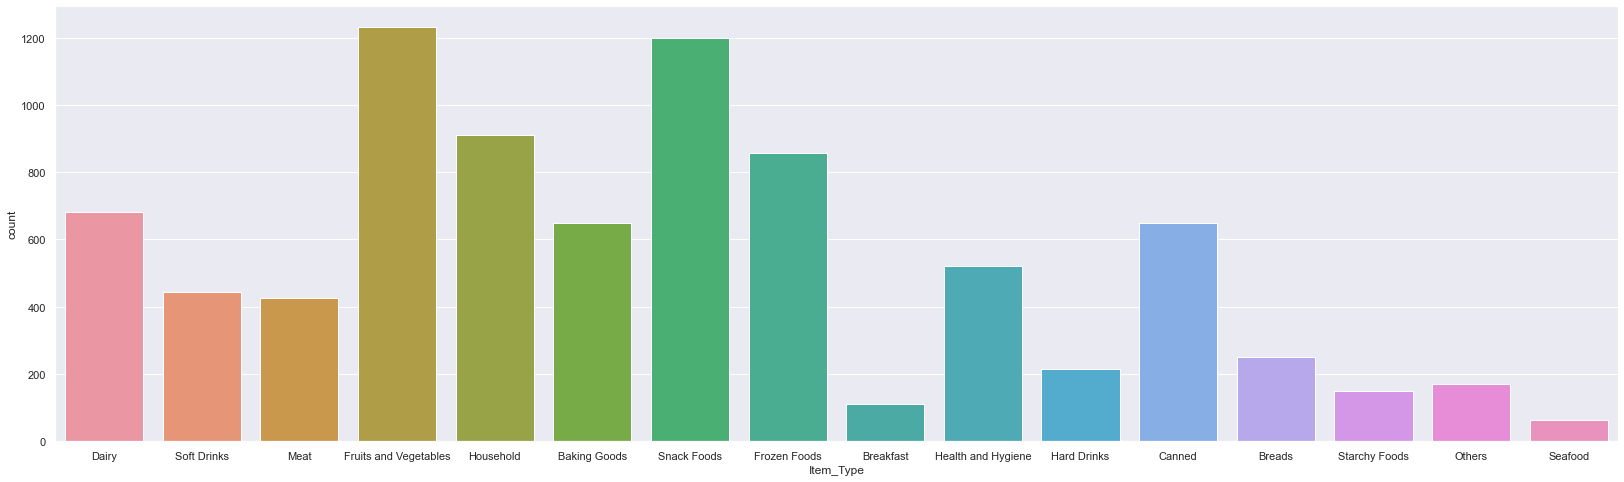

In [37]:
# ProductType
plt.figure(figsize = (28,8))
sns.countplot(x ='Item_Type',data = big_mart_data)
plt.show()



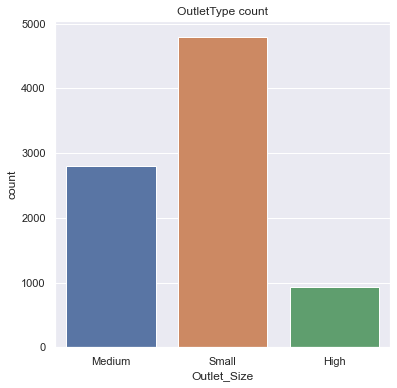

In [39]:
# OutletSize
plt.figure(figsize = (6,6))
sns.countplot(x ='Outlet_Size',data = big_mart_data)
plt.title('OutletType count')
plt.show()

# Data Preprocessing

In [40]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [41]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [42]:
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [43]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Label Encoding

In [44]:
encoder = LabelEncoder()

In [47]:
big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])
big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])
big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])
big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])
big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])
big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])


In [48]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Splitting features and target

In [49]:
X = big_mart_data.drop(columns = 'Item_Outlet_Sales',axis = 1)
y = big_mart_data["Item_Outlet_Sales"]

In [50]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [51]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Splitting the data into trainning data and test data

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


# Machine Learning Model Trainning

XGBoost Regressor

In [53]:
model = XGBRegressor(n_estimators = 750,learning_rate = 0.007)

In [54]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.007, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=750, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

Model Evaluation

In [55]:
# trainning data prediction
train_data_prediction = model.predict(X_train)

In [56]:
# R squared value
r2_train = metrics.r2_score(y_train,train_data_prediction)
print("R Squared Value : ",r2_train)

R Squared Value :  0.6893118323671267


In [57]:
# test data prediction
test_data_prediction = model.predict(X_test)

In [58]:
# R squared value
r2_test = metrics.r2_score(y_test,test_data_prediction)
print("R Squared Value : ",r2_test)

R Squared Value :  0.5785946070666922


Now testing our data on unknown OutletSales Dataset

In [59]:
big_mart_test_data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")

# Getting top 5 rows 
big_mart_test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [60]:
big_mart_test_data.shape

(5681, 11)

In [61]:
big_mart_test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [62]:
# Mean Value
big_mart_test_data["Item_Weight"].fillna(big_mart_test_data["Item_Weight"].mean(),inplace=True)
big_mart_test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [63]:
# Mode 
mode_of_test_outlet_size = big_mart_test_data.pivot_table(values = 'Outlet_Size', index = 'Outlet_Type',aggfunc=(lambda x : mode(x.dropna()).mode[0]))
print(mode_of_test_outlet_size)

                  Outlet_Size
Outlet_Type                  
Grocery Store           Small
Supermarket Type1       Small
Supermarket Type2      Medium
Supermarket Type3      Medium


In [65]:
missing_values_test = big_mart_test_data["Outlet_Size"].isnull()
print(missing_values_test)

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool


In [66]:
big_mart_test_data.loc[missing_values_test, 'Outlet_Size'] = big_mart_test_data.loc[missing_values_test, 'Outlet_Type'].apply(lambda x: mode_of_test_outlet_size.loc[x])

In [67]:
# Checking if there is any missing value in our dataset
big_mart_test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Data Analysis

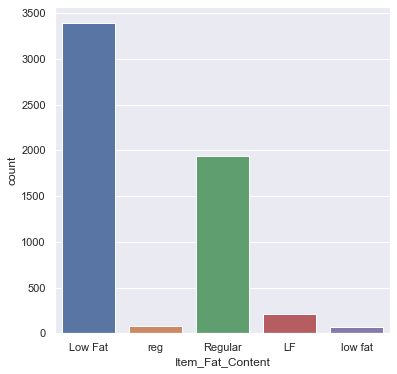

In [68]:
# FatContent
plt.figure(figsize = (6,6))
sns.countplot(x ='Item_Fat_Content',data = big_mart_test_data)
plt.show()

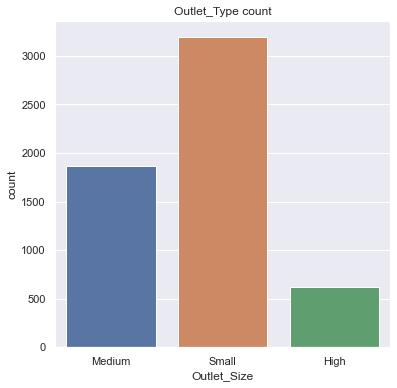

In [69]:
# OutletSize
plt.figure(figsize = (6,6))
sns.countplot(x ='Outlet_Size',data = big_mart_test_data)
plt.title('Outlet_Type count')
plt.show()

In [70]:
big_mart_test_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
big_mart_test_data['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

# Data Preprocessing

Label Encoder

In [71]:
big_mart_test_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_test_data['Item_Fat_Content'])
big_mart_test_data['Item_Type'] = encoder.fit_transform(big_mart_test_data['Item_Type'])
big_mart_test_data['Outlet_Size'] = encoder.fit_transform(big_mart_test_data['Outlet_Size'])
big_mart_test_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_test_data['Outlet_Location_Type'])
big_mart_test_data['Outlet_Type'] = encoder.fit_transform(big_mart_test_data['Outlet_Type'])
big_mart_test_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_test_data['Outlet_Identifier'])
big_mart_test_data['Item_Identifier'] = encoder.fit_transform(big_mart_test_data['Item_Identifier'])


In [72]:
big_mart_test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,2,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,2,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


Fitting the trainning data and predicting the values for test data

In [73]:
model.fit(X,y)
test_predictions = model.predict(big_mart_test_data)
print(test_predictions)

[1600.8915  1346.271    588.91925 ... 1874.8893  3582.4927  1317.5718 ]


In [75]:
# converting array into dataframe
OutletSales = test_predictions 
df = pd.DataFrame(OutletSales, columns = ['OutletSales'])

In [76]:
big_mart_test_data['Outlet_Sales'] = OutletSales
big_mart_test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Sales
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1,1600.891479
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,2,1,1,1346.270996
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0,588.919250
3,809,7.315000,0,0.015388,13,155.0340,2,2007,2,1,1,2417.099121
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3,6255.786621


In [77]:
# Converting big_mart_data to csv file
big_mart_test_data.to_csv("big_mart_data_predictions.csv")